In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

In [54]:
df = pd.read_csv('./creditcardcsvpresent.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

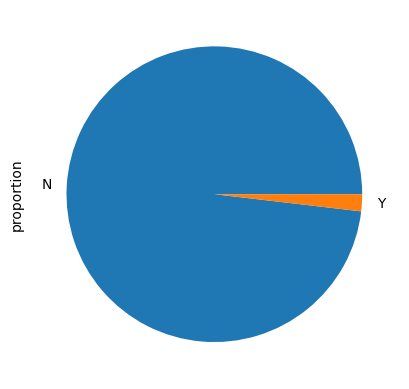

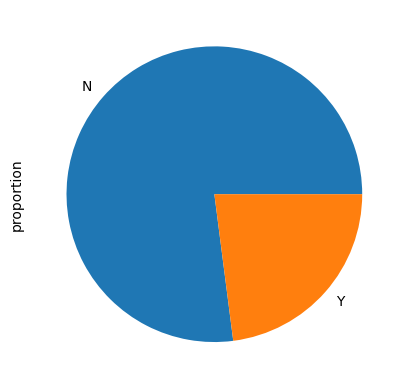

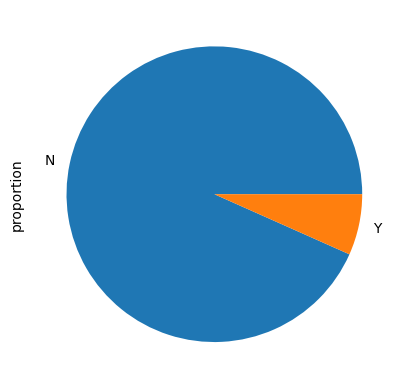

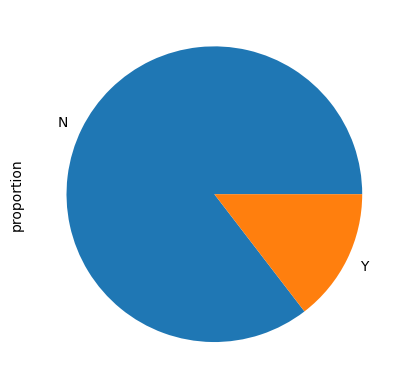

In [56]:
for col in df.select_dtypes("object"):
    plt.figure()
    df[col].value_counts(normalize=True).plot.pie()

In [48]:
def convert_yes_no(value):
    return 1 if value == 'Y' else 0

for col in ['Is declined_Y', 'isForeignTransaction_Y', 'isHighRiskCountry_Y', 'isFradulent_Y']:
    if col in df.columns:
        df[col] = df[col].apply(convert_yes_no)

df = df.apply(pd.to_numeric, errors='coerce')

In [49]:
df.describe()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,Is declined_Y,isForeignTransaction_Y,isHighRiskCountry_Y,isFradulent_Y,anomaly,cluster
count,3.075000e+03,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.0,3075.0,3075.0,3075.0,3075.000000,3075.000000
mean,5.026634e+09,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870,0.0,0.0,0.0,0.0,0.899837,0.400000
std,9.870778e+08,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479,0.0,0.0,0.0,0.0,0.436296,0.574903
min,3.160041e+09,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-1.000000,0.000000
25%,4.170814e+09,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000
50%,5.025578e+09,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000
75%,5.889625e+09,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,1.000000
max,6.665906e+09,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000,0.0,0.0,0.0,0.0,1.000000,2.000000


<Axes: >

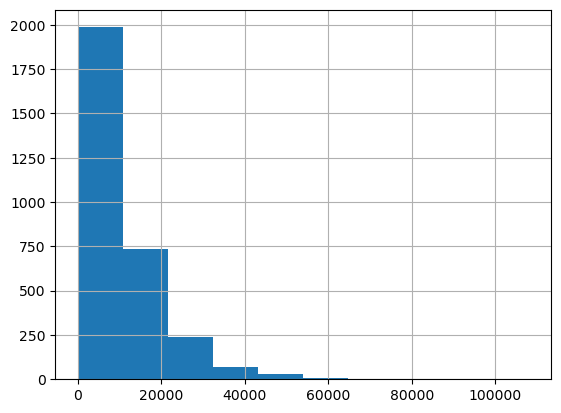

In [50]:
df['Transaction_amount'].hist()

In [51]:
df.corr()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,Is declined_Y,isForeignTransaction_Y,isHighRiskCountry_Y,isFradulent_Y,anomaly,cluster
Merchant_id,1.000000,0.018223,0.046065,-0.016165,0.088802,0.091621,0.118599,NaN,NaN,NaN,NaN,-0.047276,0.032472
Average Amount/transaction/day,0.018223,1.000000,0.587111,-0.009682,0.060429,0.060284,0.071849,NaN,NaN,NaN,NaN,-0.066200,0.526522
Transaction_amount,0.046065,0.587111,1.000000,0.259309,0.252298,0.259663,0.297623,NaN,NaN,NaN,NaN,-0.271816,0.887770
Total Number of declines/day,-0.016165,-0.009682,0.259309,1.000000,0.094834,0.081138,0.085028,NaN,NaN,NaN,NaN,-0.135738,0.235746
Daily_chargeback_avg_amt,0.088802,0.060429,0.252298,0.094834,1.000000,0.953663,0.884611,NaN,NaN,NaN,NaN,-0.847313,0.219907
6_month_avg_chbk_amt,0.091621,0.060284,0.259663,0.081138,0.953663,1.000000,0.851339,NaN,NaN,NaN,NaN,-0.840576,0.227174
6-month_chbk_freq,0.118599,0.071849,0.297623,0.085028,0.884611,0.851339,1.000000,NaN,NaN,NaN,NaN,-0.796090,0.245199
Is declined_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isForeignTransaction_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isHighRiskCountry_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df = df.drop(columns=['Transaction date'])

In [33]:
numerical_stats = df.describe()

In [35]:
categorical_cols = ['Is declined_Y', 'isForeignTransaction_Y', 'isHighRiskCountry_Y', 'isFradulent_Y']
categorical_freq = {col: df[col].value_counts() for col in categorical_cols}


In [52]:
correlation_matrix = df.corr()

In [39]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df.select_dtypes(include=[np.number]))

In [40]:
anomalies_count = df['anomaly'].value_counts()
kmeans_data = df[['Average Amount/transaction/day', 'Transaction_amount', 
                  'Total Number of declines/day', 'Daily_chargeback_avg_amt',
                  '6_month_avg_chbk_amt', '6-month_chbk_freq']]

In [41]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(kmeans_data)


In [42]:
cluster_centers = kmeans.cluster_centers_
anomalies_count, cluster_centers, df['cluster'].value_counts()


(anomaly
  1    2921
 -1     154
 Name: count, dtype: int64,
 array([[4.02153583e+02, 4.03821498e+03, 6.62298387e-01, 2.77888105e+01,
         1.85146169e+01, 1.69858871e-01],
        [7.00174972e+02, 1.75071163e+04, 1.22794118e+00, 8.78760504e+01,
         6.38938025e+01, 6.12394958e-01],
        [8.58038700e+02, 4.09448511e+04, 3.31654676e+00, 2.34546763e+02,
         1.83517986e+02, 2.05035971e+00]]),
 cluster
 0    1984
 1     952
 2     139
 Name: count, dtype: int64)

In [1]:
numeric_cols = df.select_dtypes(include=[float, int]).columns

# Eliminar columnas con valores constantes
constant_cols = [col for col in numeric_cols if df[col].nunique() <= 1]
df_cleaned = df.drop(columns=constant_cols)

# Calcular la matriz de correlación
correlation_matrix_cleaned = df_cleaned.corr()

# Mostrar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

NameError: name 'df' is not defined